# Object Detection in Open CV

In [1]:
# Open image in openCv
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## 1. Template Matching 
* Matching part of image to big image 

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

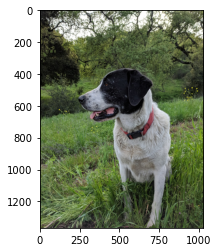

In [3]:
plt.imshow(full)

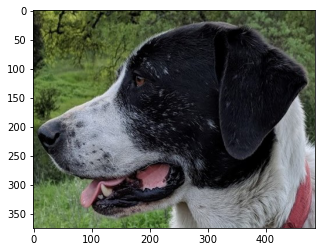

In [4]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

* Try to match the dog face to the full body picture

In [5]:
# List of template matching algorithm
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

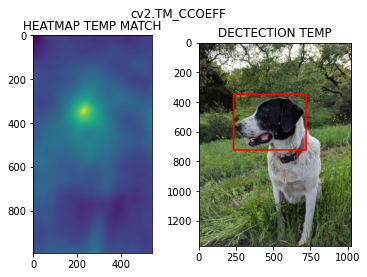

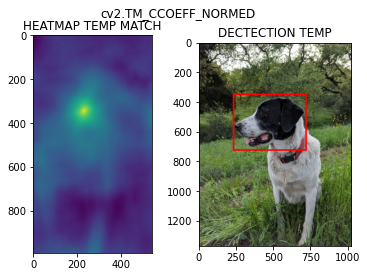

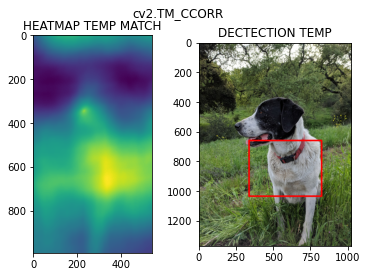

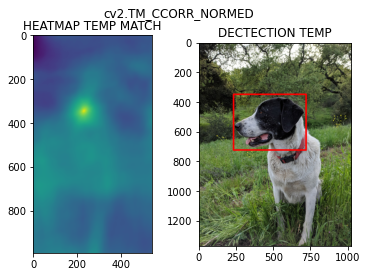

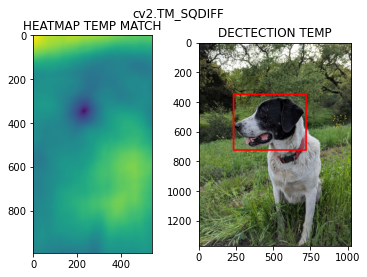

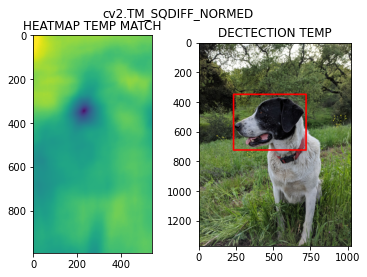

In [6]:
for m in methods:

    # Create copy of image so we not mess up the original
    full_copy = full.copy()
    method = eval(m) # use eval to change string to same name funtion/mehod

    #template matching
    # find the top left point of small picture in big picture
    res = cv2.matchTemplate(full_copy,face,method)
    # return the heatmap of template matching in array
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) #find global max,min in array
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,channel = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP TEMP MATCH')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DECTECTION TEMP')
    plt.suptitle(m)

    plt.show()


## 2. Corner Detection
* Find corner in image

### 2.1 Harris corner algorithm

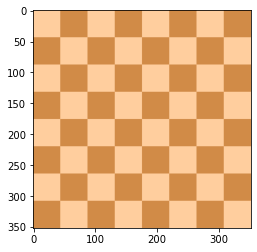

In [7]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

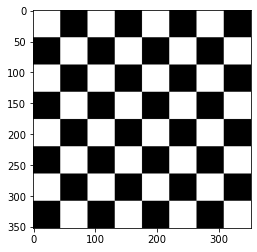

In [8]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

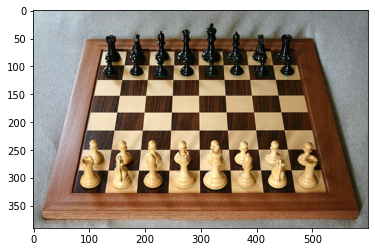

In [9]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

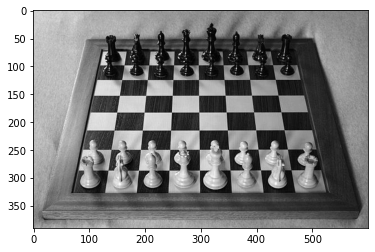

In [10]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [11]:
gray = np.float32(gray_flat_chess)

In [12]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [13]:
dst = cv2.dilate(dst,None)

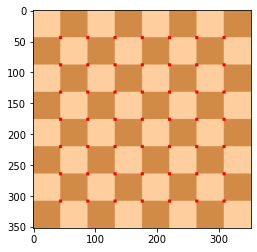

In [14]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(flat_chess)

In [15]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)

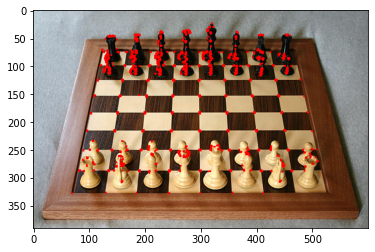

In [16]:
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

### 2.2 Shi-Tomashi Algorithm

In [17]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

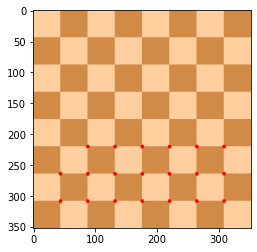

In [18]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,20,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)
plt.imshow(flat_chess)


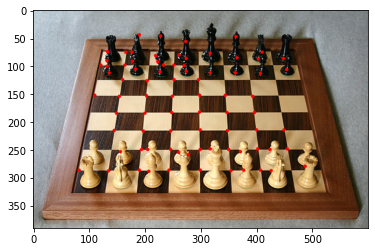

In [19]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
plt.imshow(real_chess)